In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

In [2]:
# 원래 데이터 : X0
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

##### Bias augmentation

In [16]:
# 방법 1
X = np.hstack([np.ones((len(X0),1)),X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [18]:
# 방법 2
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

### numpy를 이용한  선형회귀분석
- OLS(Ordinary Least Square)방법

In [1]:
from sklearn.datasets import make_regression

In [9]:
bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10,
                             coef=True, random_state=1)
X = sm.add_constant(X0)
X.shape

(100, 2)

In [11]:
y = y.reshape(len(y),1)
y.shape

(100, 1)

In [12]:
coef

array(80.71051956187792)

위의 방정식
$$ y = 100 + 80.7105x + 10 $$

##### 1) OLS 해를 직접 이용하는 방법

In [14]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
w

array([[ 102.02701439],
       [  81.59750943]])

선형회귀를 통해 구한 식
$$ y-hat = 102.0270+81.5975x $$

실제와 비슷하지만 정확하지는 않다.

##### 2) lstsq 명령을 이용하는 방법

In [20]:
w = np.linalg.lstsq(X,y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

##### 실제와 분석결과의 차이를 비교해보자

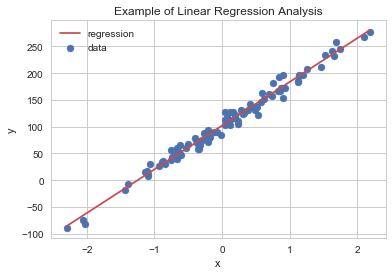

In [30]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w) # x_new와 y_new는 정확한 직선의 관계로 나올 것이다.

plt.scatter(X0, y, label="data") # 샘플로 뽑고 여기서 w를 구한 것이기때문에 완전선형관계는 안나온다.
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

### Scikit-Learn 패키지를 사용한 선형회귀분석

In [31]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target) # 자동으로 augmentation해줌

In [33]:
model_boston.coef_ # 추정된 가중치 벡터

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [34]:
model_boston.intercept_ # 추정된 상수항

36.491103280361983

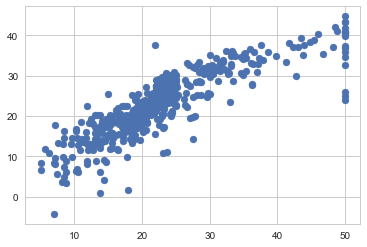

In [35]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions) # 실제집값과 추정 집값 비교
plt.show()

##### StatsModels 를 사용한 선형회귀분석

In [36]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0) # augmentation
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit() # 모형 추정결과가 객체로 출력된다.
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 25 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        14:54:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

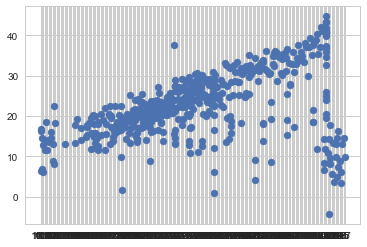

In [42]:
dfy_new = result_boston2.predict(dfX)

# plt.figure(figsize=(8,3))
plt.scatter(dfy, dfy_new) # 실제집값과 추정 집값 비교
plt.show()

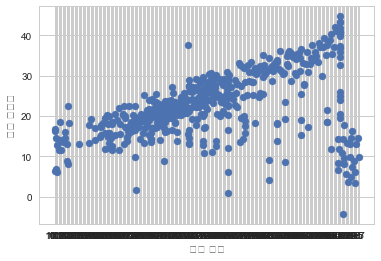

In [43]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()